# Student Performance Indicator 

## 1) Problem Statement 
### - This projects understand how students performance(test scores)  is affected by other variables such as Gender,Ethinicity,Parent level of education         ,lunch and test preparation course.

## 2) Data Collection 
### -Data source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
### -This dat contains 8 columns and 1000 rows.

## 2.1 Import Data and Required Packages
###  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import cvs data and convert to panda dataframe

In [2]:
data=pd.read_csv("D:/ML_PROJECT_1/notebooks/data/stud.csv")


### Top 5 data

In [3]:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the data

In [4]:
data.shape

(1000, 8)

## 2.2 Data Information

### - gender : sex of students  -> (Male/female)
### - race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
### - parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
### - lunch : having lunch before test (standard or free/reduced) 
### - test preparation course : complete or not complete before test
### - math score
### - reading score
### - writing score

## 3) Data Check to perform 
### -Check missing values
### -Check duplicate values
### -Check data types
### -Check unique values for each colums
### -Check statistics of the data
### -Check various categories present in the different categorical column

## 3.1 Check missing values

In [29]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the dataset

## 3.2 Check duplicate values

In [41]:
data.duplicated().sum()


0

there is no duplicate values in the data

## 3.3 Check data type 

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Check the unique values for each columns

In [74]:
column=data.columns
for i in range(8):
    temp=column[i]
    print(temp,' :', data[temp].unique())
    

gender  : ['female' 'male']
race_ethnicity  : ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education  : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch  : ['standard' 'free/reduced']
test_preparation_course  : ['none' 'completed']
math_score  : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score  : [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing_score  : [ 74 

In [76]:
# check the number of unique values
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check statistics of data

In [78]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
      - From above description of numerical data, all means are very close to each other - between 66 and 68.05;
      - All standard deviations are also close - between 14.6 and 15.19;
      - While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading also is higher = 17

## 3.7 Exploring Data

In [87]:
#defining categorical and numerical features
numerical_categories=[feature for feature in data.columns if data[feature].dtype!='O']
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']

print('We have {} numerical features : {} '.format(len(numerical_categories),numerical_categories))
print('\nWe have {} categorical features : {} '.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score'] 

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


## 3.8 Adding columns for "Total Score" and "Average Score"

In [4]:
data['total_score']=data['math_score'] + data['reading_score'] + data['writing_score']
data['average_score']=data['total_score']/3
data.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333


In [6]:
reading_score_full=data[data['reading_score']==100]['average_score'].count()
writing_score_full=data[data['writing_score']==100]['average_score'].count()
math_score_full=data[data['math_score']==100]['average_score'].count()

print(f'Number of students got full in maths  : {math_score_full} ')
print(f'Number of students got full in reading  : {reading_score_full} ')
print(f'Number of students got full in writing  : {writing_score_full} ')

Number of students got full in maths  : 7 
Number of students got full in reading  : 17 
Number of students got full in writing  : 14 


#####  Insights
 - From above values we can tell that plenty of students have scored full marks
 - Best performance is in reading section

In [128]:
reading_less_20=data[data['reading_score']<20]['average_score'].count()
writing_less_20=data[data['writing_score']<20]['average_score'].count()
math_less_20=data[data['math_score']<20]['average_score'].count()

print(f'Number of students got less the 20 marks in reading : {reading_less_20} ')
print(f'Number of students got less the 20 marks in writing : {writing_less_20} ')
print(f'Number of students got less the 20 marks in maths :   {math_less_20} ')


Number of students got less the 20 marks in reading : 1 
Number of students got less the 20 marks in writing : 3 
Number of students got less the 20 marks in maths :   4 


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

## 4) Exploatory Data analysis (Visualization)
### 4.1) visualize average score distribution to make some conclusion
 - Histogram
 - Kernel Distribution Function(KDE)

### 4.1.1) Histogram and KDE

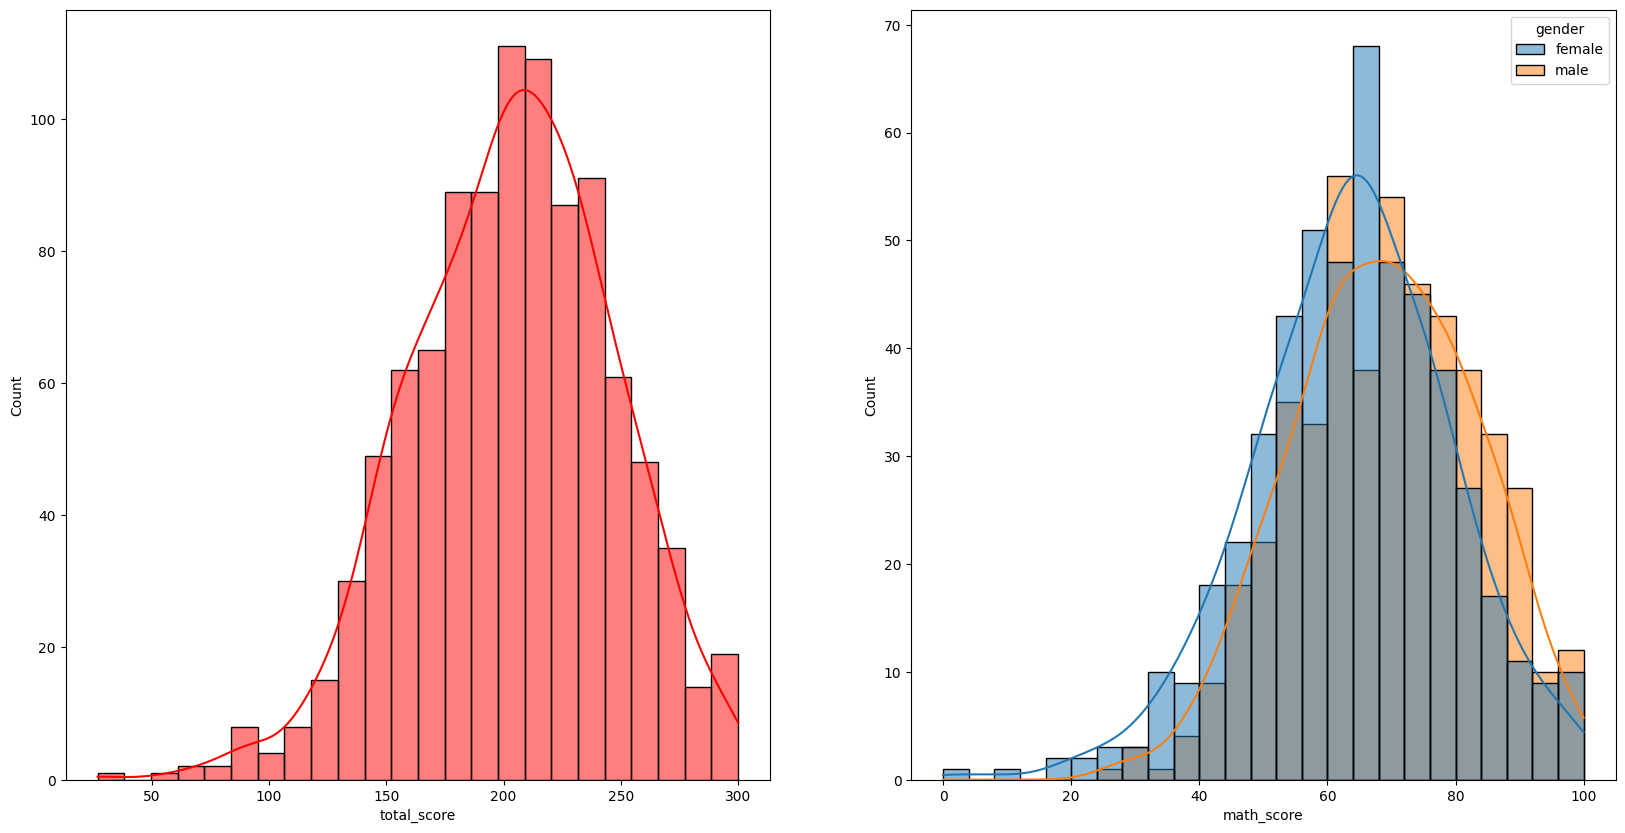

In [147]:
fig,axes=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.histplot(data=data,x='total_score',kde=True,color='r')
plt.subplot(122)
sns.histplot(data=data,x='math_score',hue='gender',kde=True)
plt.show()


#### Insights
 - Form above graph we can conclude that female students are tend to perform better than male students

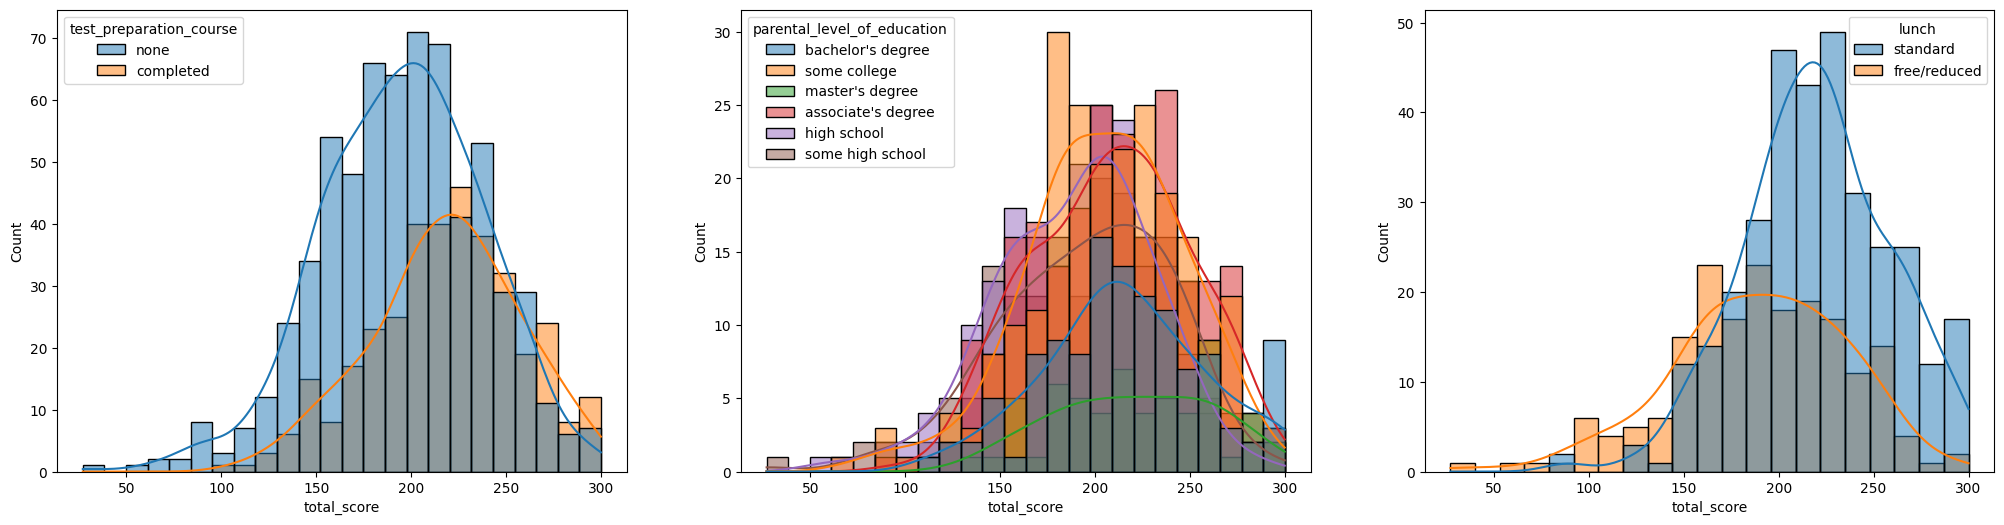

In [164]:
fig,axes=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=data,x='total_score',kde=True,hue='test_preparation_course')
plt.subplot(132)
sns.histplot(data=data,x='total_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=data[data.gender=='female'],x='total_score',hue='lunch',kde=True)
plt.show()

#### Insights
 - From first plot we can see that ,students with completed test preparation course scored high total scores
 - Second plot shows that student scores are uneffected from there parent's education
 - Female students takes preety standard lunch

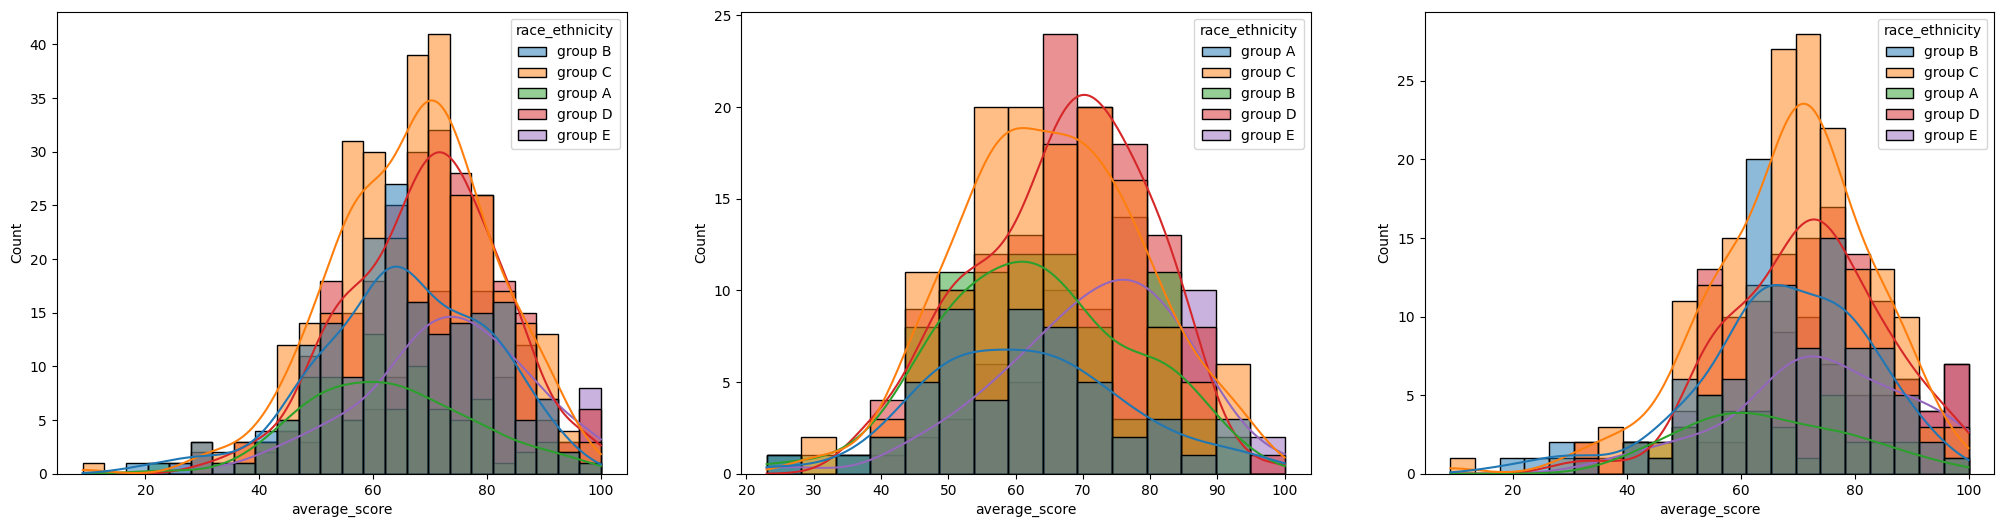

In [168]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax=sns.histplot(data=data,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax=sns.histplot(data=data[data.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax=sns.histplot(data=data[data.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

#### Insights
 - fistPlot : group c and group d students are performing well 
 - from 2nd and 3rd plot also we can see that female and male students of group d and c have scored well 

## 4.2) Maximum score of students in all three subjects

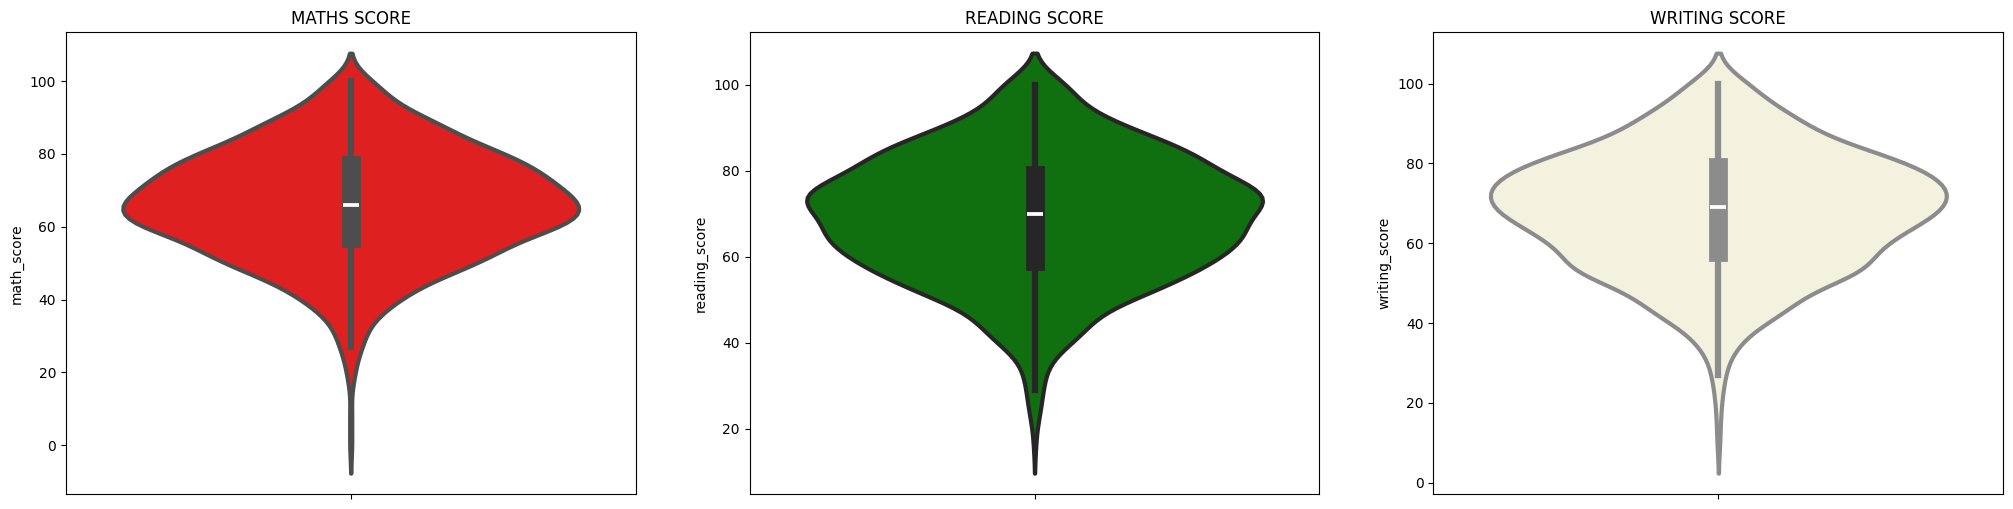

In [176]:
fig,axes = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
plt.title('MATHS SCORE')
sns.violinplot(data=data,y='math_score',color='red',linewidth=3)
plt.subplot(132)
plt.title('READING SCORE')
sns.violinplot(data=data,y='reading_score',color='green',linewidth=3)
plt.subplot(133)
plt.title('WRITING SCORE')
sns.violinplot(data=data,y='writing_score',color='beige',linewidth=3)
plt.show()


#### Insights 
 -  From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## 4.3 Multivariate Analysis using pieplot


(-1.25, 1.25, -1.25, 1.25)

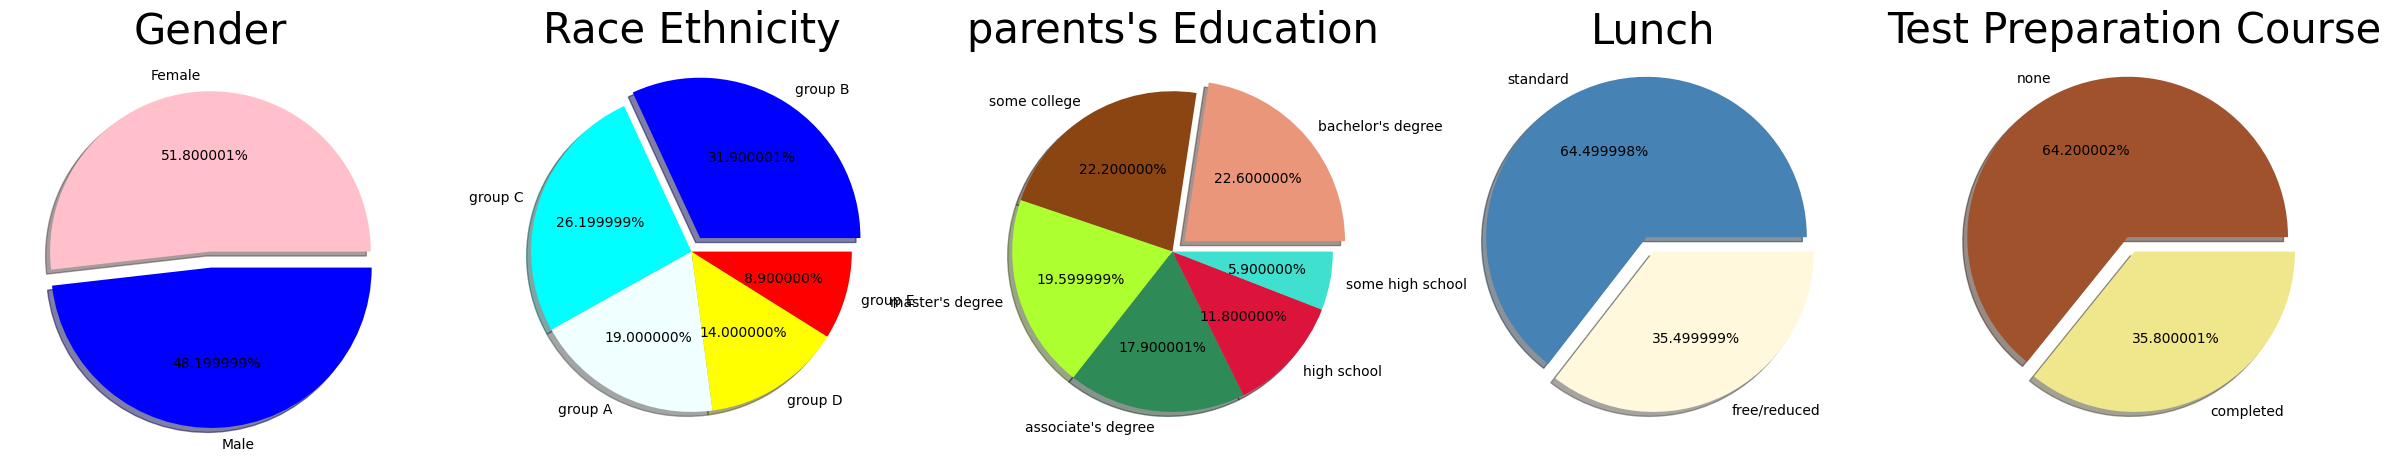

In [30]:
plt.rcParams['figure.figsize']=(30,12)
#subplot 1
plt.subplot(1,5,1)
size=data['gender'].value_counts()
label='Female','Male'
color=['pink','blue']

plt.pie(size,colors=color,labels=label,autopct='%2f%%',explode=[0,0.1],shadow=True)
plt.title('Gender',fontsize=30)
plt.axis('off')
# subplot 2
plt.subplot(1,5,2)
size=data['race_ethnicity'].value_counts()
label='group B' ,'group C' ,'group A' ,'group D' ,'group E'
color=['blue','cyan','azure','yellow','red']

plt.pie(size,colors=color,labels=label,autopct='%2f%%',explode=[0.1,0,0,0,0],shadow=True)
plt.title('Race Ethnicity',fontsize=30)
plt.axis('off')

#subplot 3
plt.subplot(1,5,3)
size=data['parental_level_of_education'].value_counts()
label= ["bachelor's degree",'some college',"master's degree","associate's degree",'high school','some high school']
color=['darksalmon','saddlebrown','greenyellow','seagreen','crimson','turquoise']

plt.pie(size,colors=color,labels=label,autopct='%2f%%',explode=[0.1,0,0,0,0,0],shadow=True)
plt.title("parents's Education",fontsize=30)
plt.axis('off')

#subplot 4
plt.subplot(1,5,4)
size=data['lunch'].value_counts()
label=['standard','free/reduced']
color=['steelblue','cornsilk']

plt.pie(size,colors=color,labels=label,autopct='%2f%%',explode=[0.1,0],shadow=True)
plt.title('Lunch',fontsize=30)
plt.axis('off')

#subplot 5
plt.subplot(1,5,5)
size=data['test_preparation_course'].value_counts()
label=['none','completed']
color=['sienna','khaki']

plt.pie(size,colors=color,labels=label,autopct='%2f%%',explode=[0.1,0],shadow=True)
plt.title('Test Preparation Course',fontsize=30)
plt.axis('off')

                                                                                  


#### Insights
 - plot-1: There are almost same number of male and female students
 - plot-2 : Group-B students are more as compared to any other group
 - plot-3 : Most of the parents have bachelor's degree followed by some college
 - plot-4 : Most of the student take standard lunch
 - plot-5 : Majority  of the students did'nt took test preparation course 

## 4.4 Feature wise Visualization
### 4.4.1 GENDER COLUMN
 - How is distribution of gender ?
 - what is the effect of gender on test scores.

#### Univariate Analysis (how is distribution of gender?)


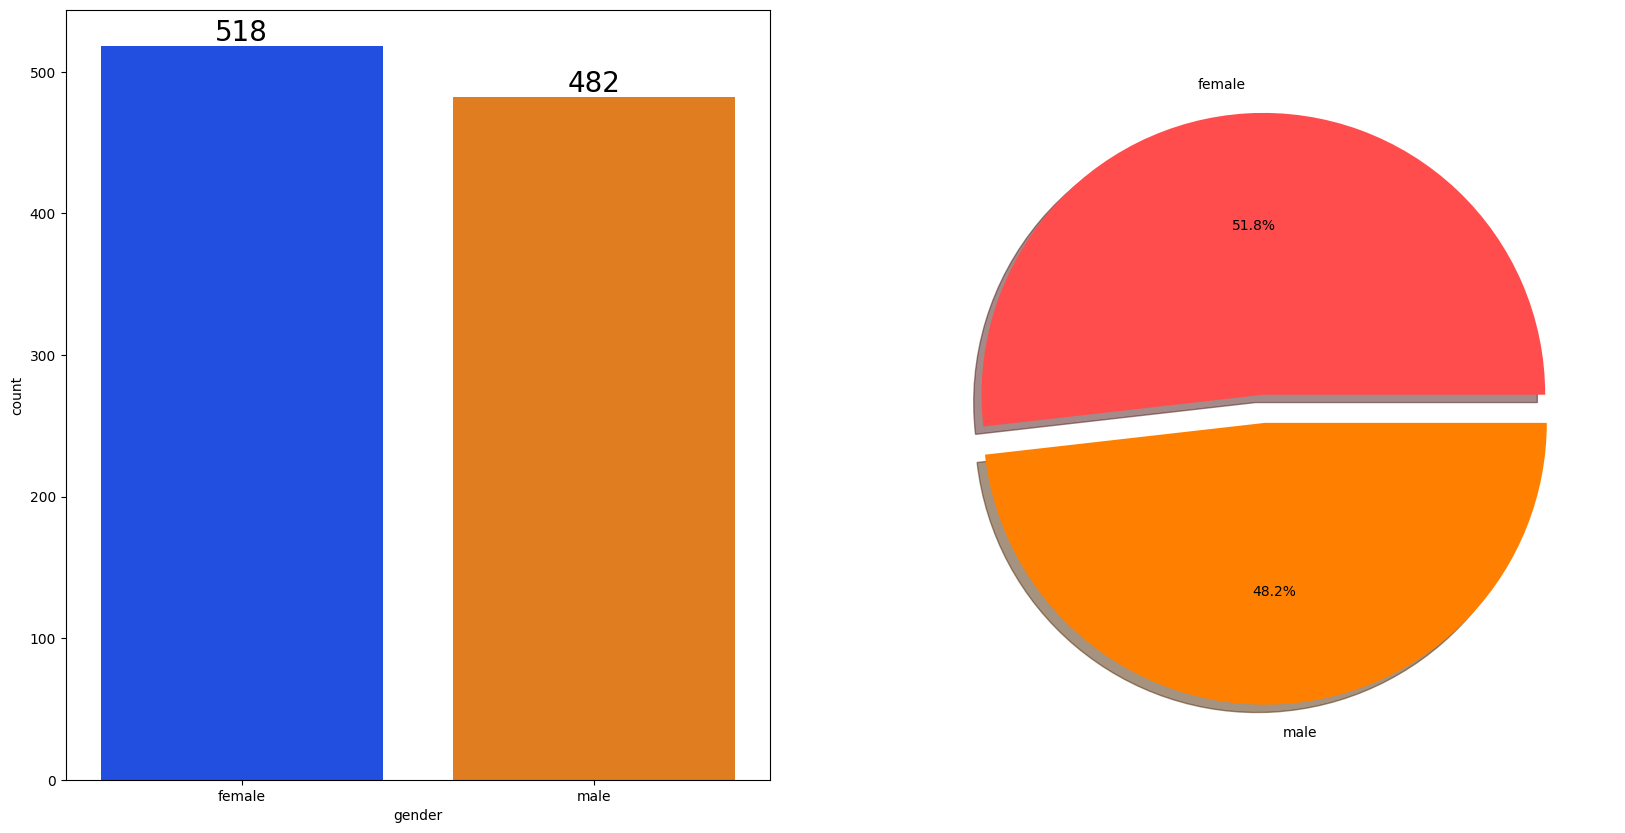

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=data['gender'].value_counts(),labels=['female','male'],colors=['#ff4d4d','#ff8000'],shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},explode=[0,0.1],autopct="%1.1f%%")
plt.show()

#### insights
- Gender has balanced data with 51.8%(518) of female and 48.2%(482) of male

#### Bivariate analysis of gender(is gender has any effect on student's performance)

In [8]:
gender_group=data.groupby('gender').mean(numeric_only=True)
gender_group


,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


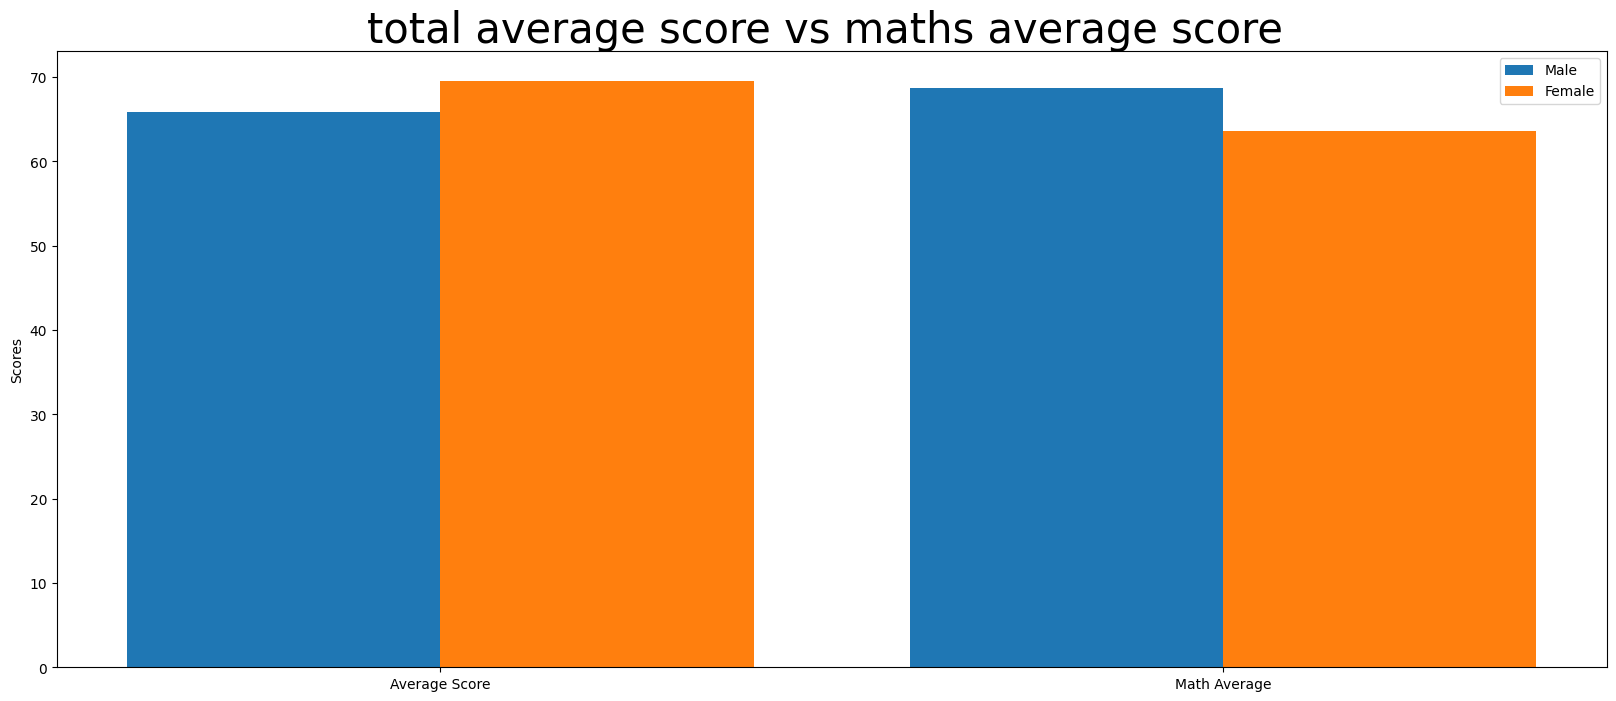

In [16]:
plt.figure(figsize=(20,8))
X=['Average Score','Math Average']
female_score=[gender_group['average_score'][0],gender_group['math_score'][0]]
male_score=[gender_group['average_score'][1],gender_group['math_score'][1]]

X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='Male')
plt.bar(X_axis+0.2,female_score,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel('Scores')
plt.title("total average score vs maths average score ",fontsize=30)
plt.legend()
plt.show()

#### Insights
 - overall both female and male students have performed well in test

### 4.4.2 Race/Ethnicity Column
- How different races are distributed in data
- is there any effect of race/etnicity on students performance

#### Univariate Analysis (How different races are distributed in data)

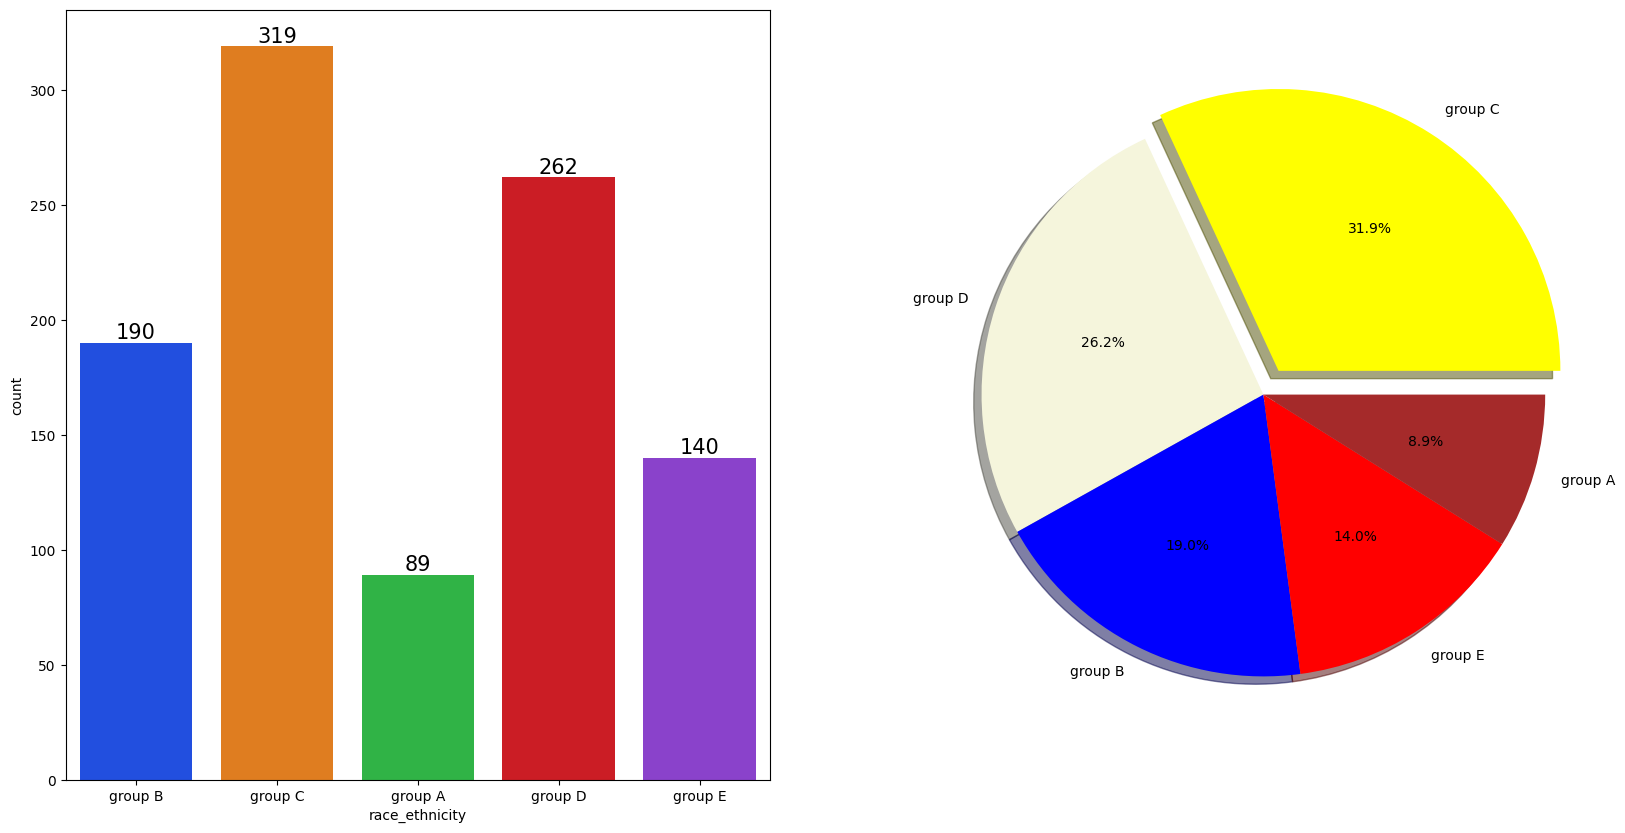

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race_ethnicity'],data=data,palette='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
plt.pie(x=data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],
        shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},colors=['yellow','beige','blue','red','brown'],autopct='%1.1f%%')
plt.show()

#### Bivariate Analysis(how race effects the student's performance)

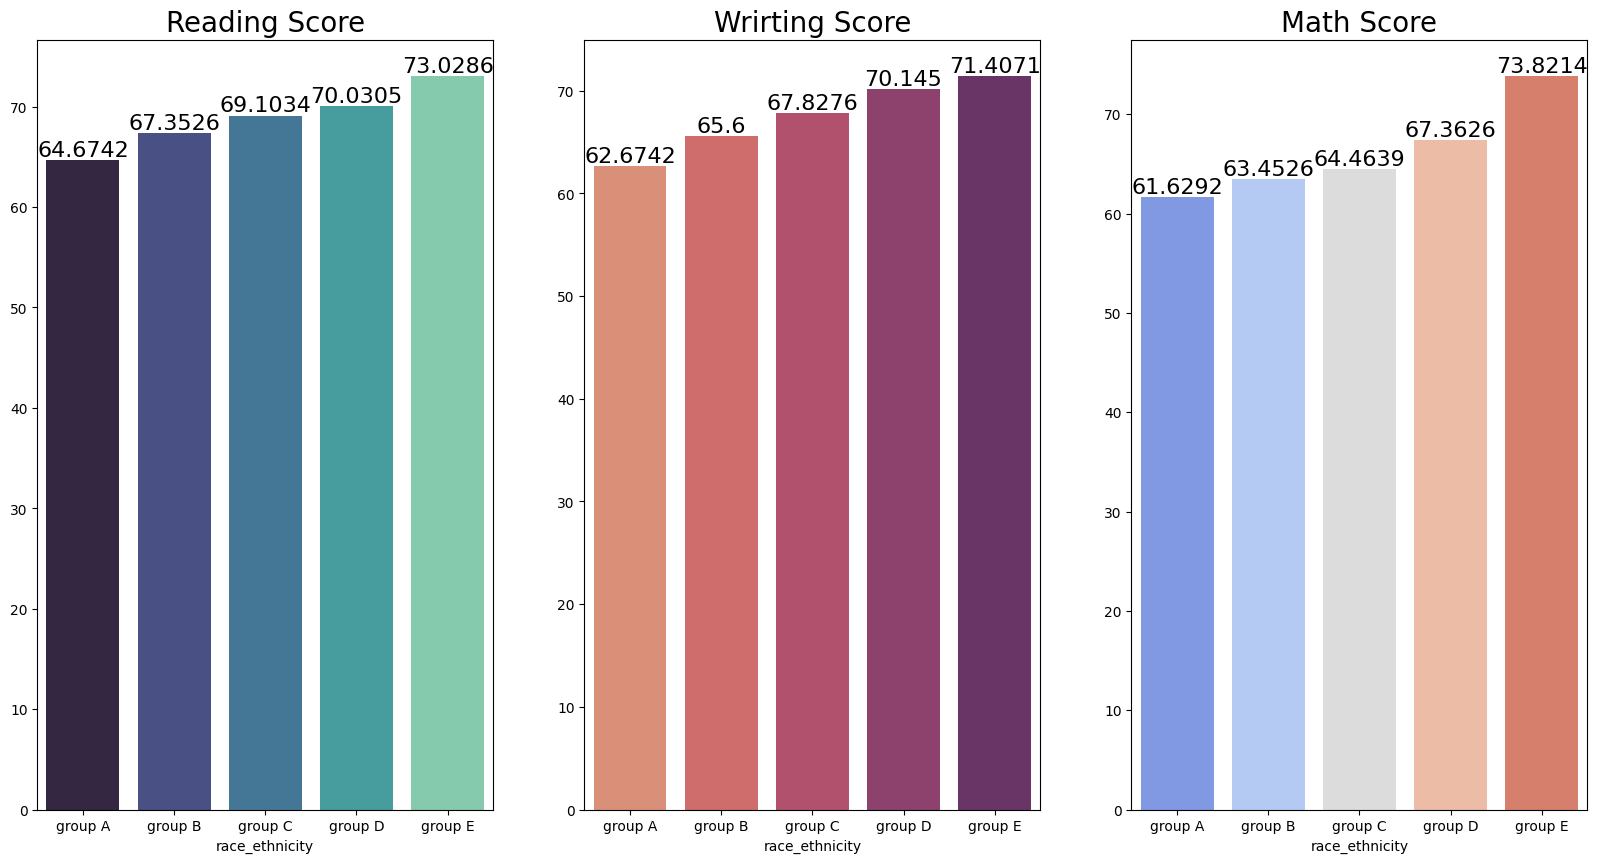

In [52]:
race_grouped=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,10))

sns.barplot(x=race_grouped['reading_score'].mean().index,y=race_grouped['reading_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Reading Score',color='black',fontsize=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',fontsize=16)
    
sns.barplot(x=race_grouped['writing_score'].mean().index,y=race_grouped['writing_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Wrirting Score',color='black',fontsize=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',fontsize=16)

sns.barplot(x=race_grouped['math_score'].mean().index,y=race_grouped['math_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Math Score',color='black',fontsize=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',fontsize=16)

plt.show()
    

#### Insights
- From above plots we can conclude that group E students have performed highest in all three subjects
- Group A students have scored low marks

### 4.4.3 Parental Level Education
- how is the distribution of parental education
- is there any effect of parental education on the performance of a student

#### Univariate Analysis 

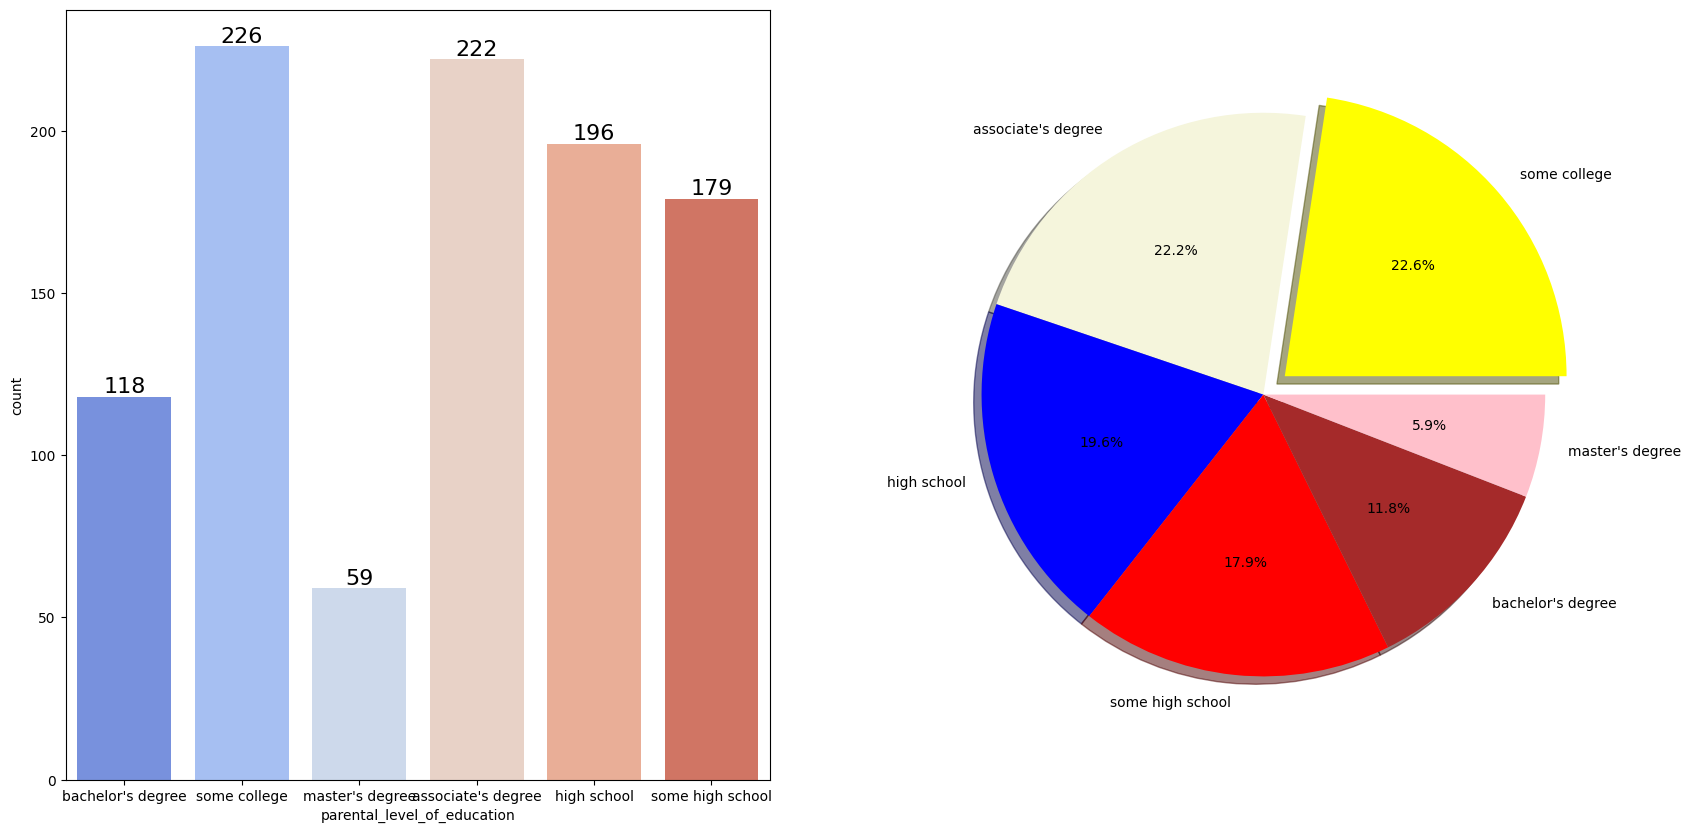

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['parental_level_of_education'],data=data,palette='coolwarm',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',fontsize=16)

plt.pie(x=data['parental_level_of_education'].value_counts(),labels=data['parental_level_of_education'].value_counts().index,explode=[0.1,0,0,0,0,0],
        shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},colors=['yellow','beige','blue','red','brown','pink'],autopct='%1.1f%%')
plt.show()

#### Insights 
- most of the parent's education level is some college

#### Bivariate Analysis (is there any effect of parental education on the performance of a student)

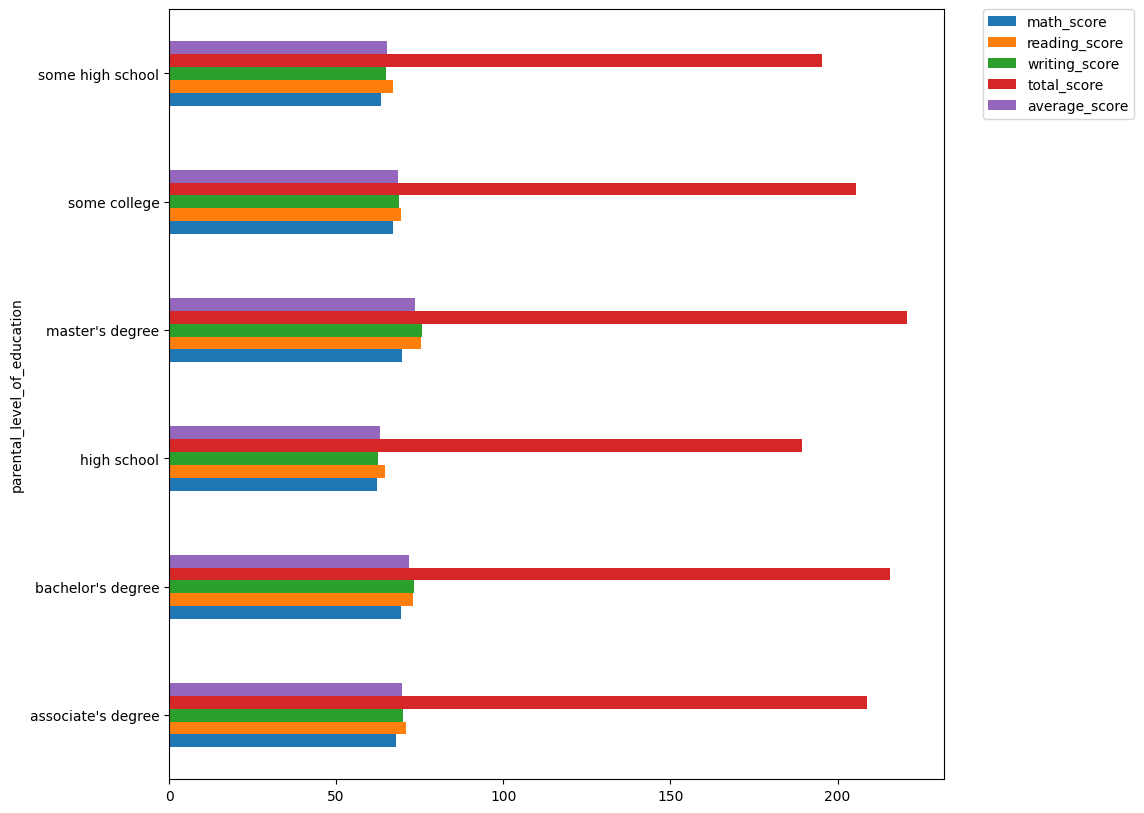

In [59]:
data.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- Student whose parents has master's degree and bachelor's degree scored good marks as compared to others


### 4.4.4 Lunch
- distribution of type of lunch in data
- does lunch has any effect on student's performance

#### Univariate Analysis(distribution of type of lunch in data)

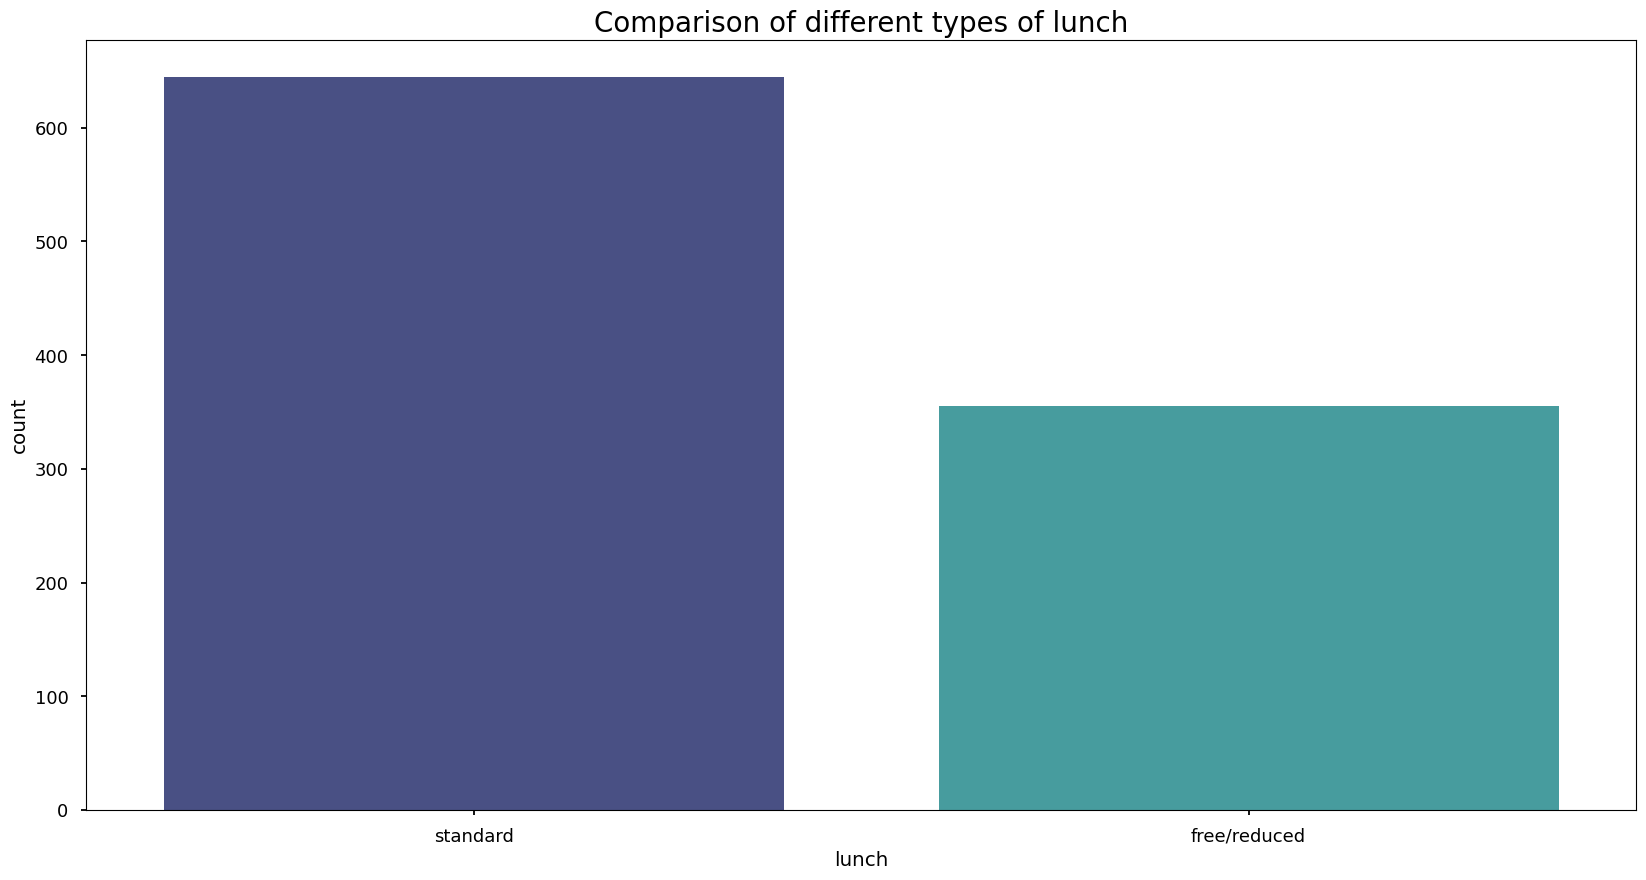

In [62]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-talk')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
sns.countplot(x=data['lunch'],data=data,palette='mako')
plt.show()


#### Insights
- Most of the students take standard lunch

#### Bivariate Analysis(does lunch has any effect on student's performance)

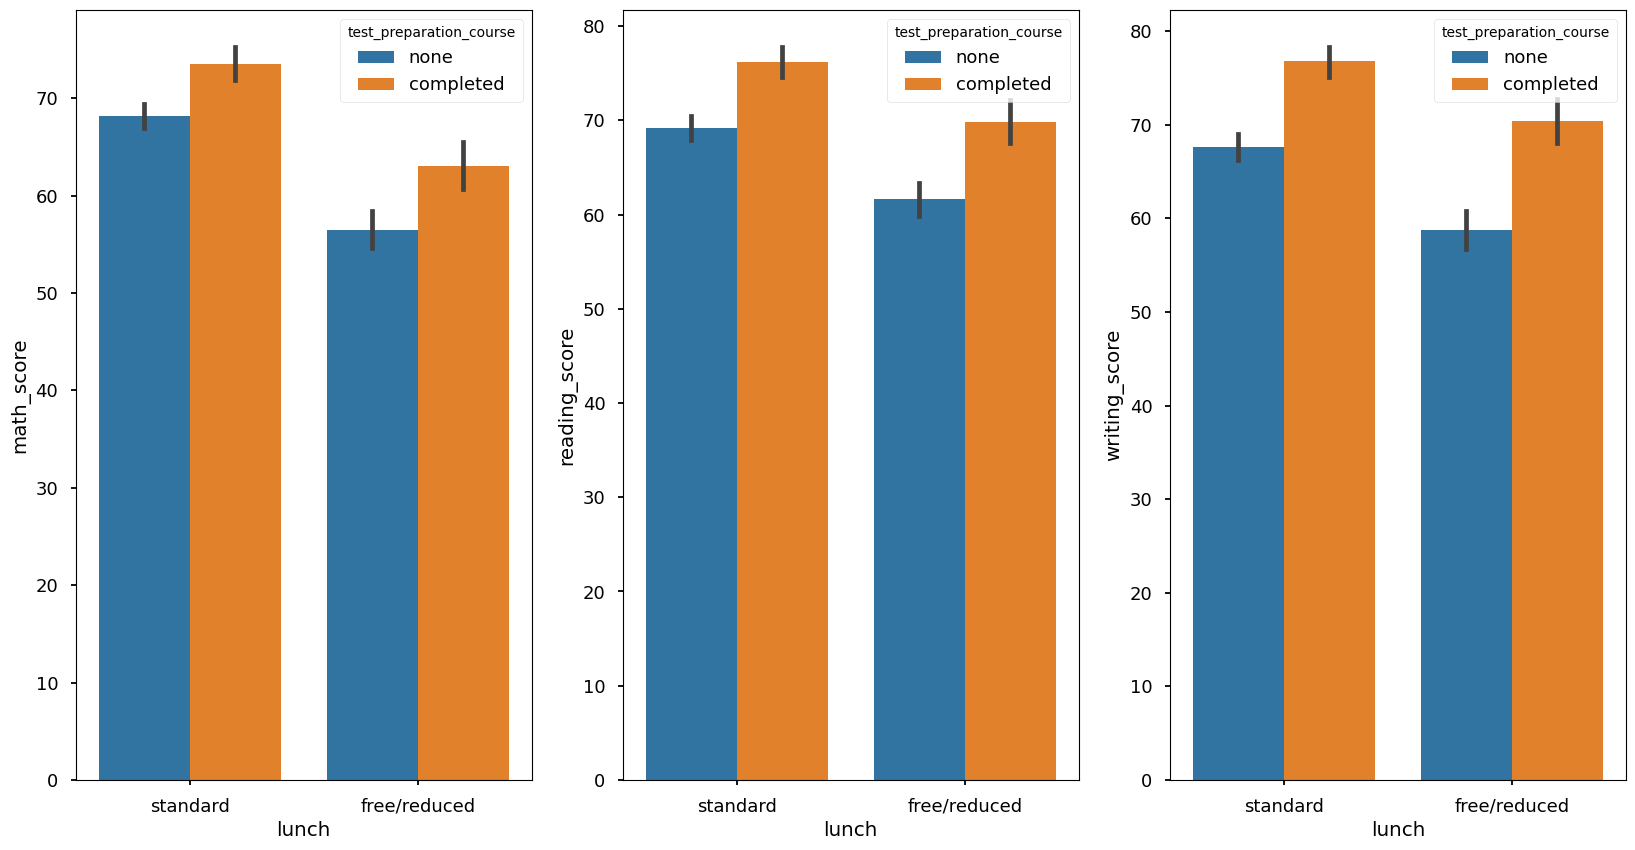

In [66]:
plt.subplots(1,3,figsize=(20,10))
plt.subplot(1,3,1)
sns.barplot(x=data['lunch'],y=data['math_score'],hue=data['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot(x=data['lunch'],y=data['reading_score'],hue=data['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot(x=data['lunch'],y=data['writing_score'],hue=data['test_preparation_course'])
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

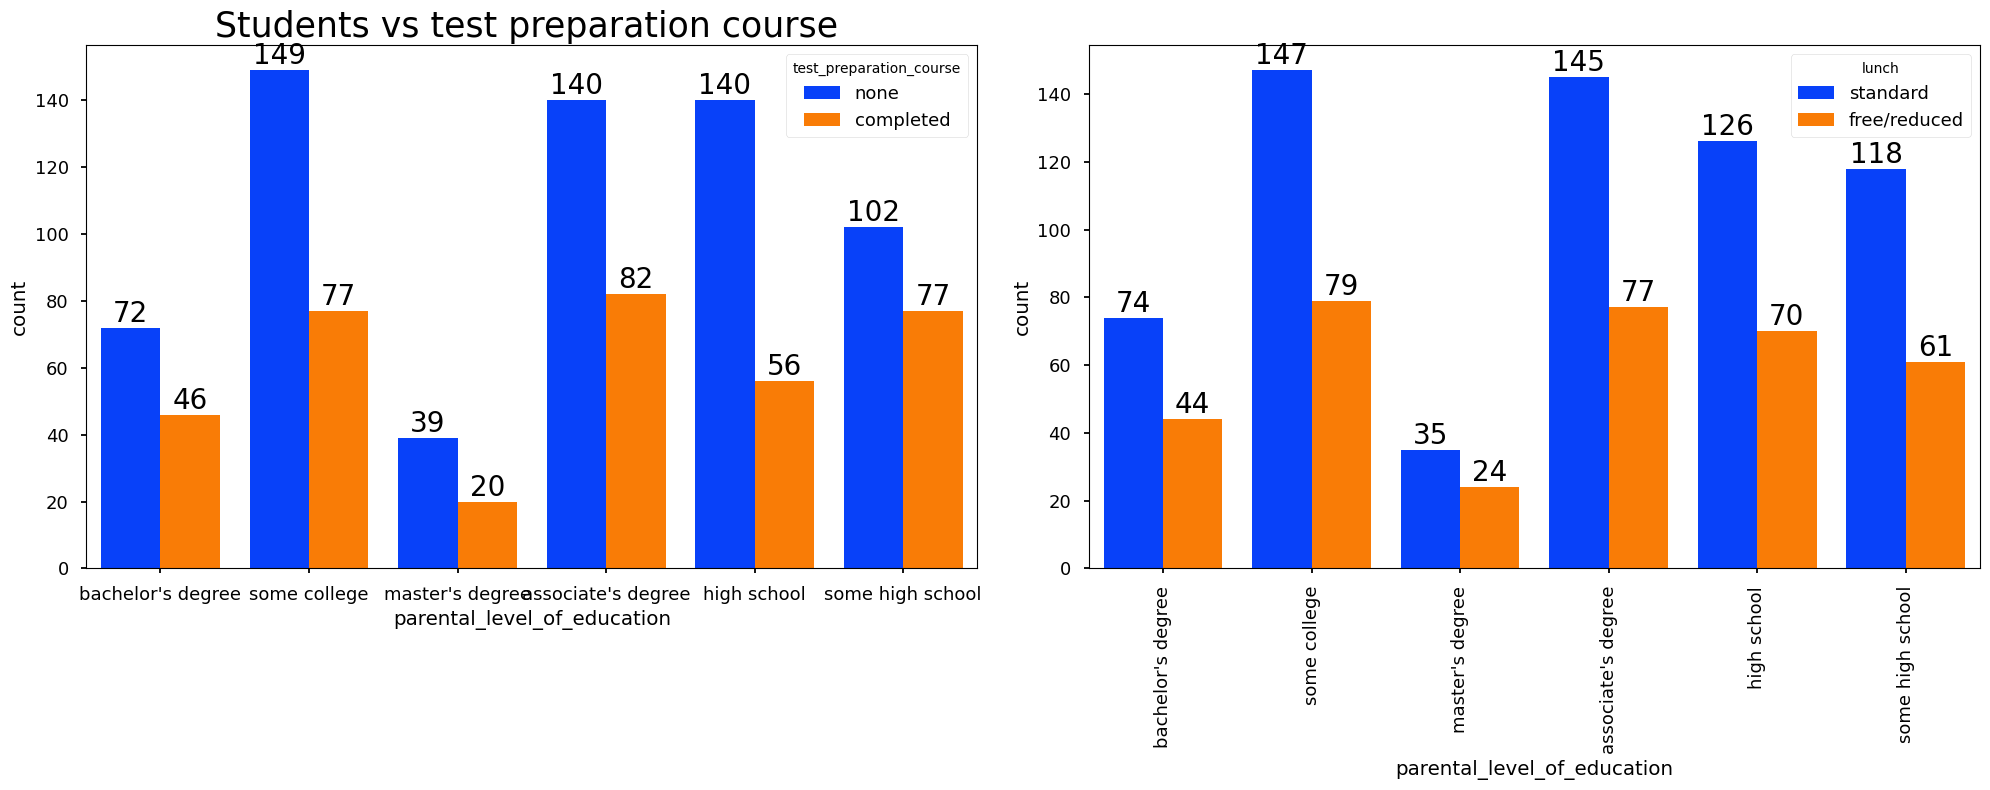

In [71]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

    
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 CHECKING OUTLIERS

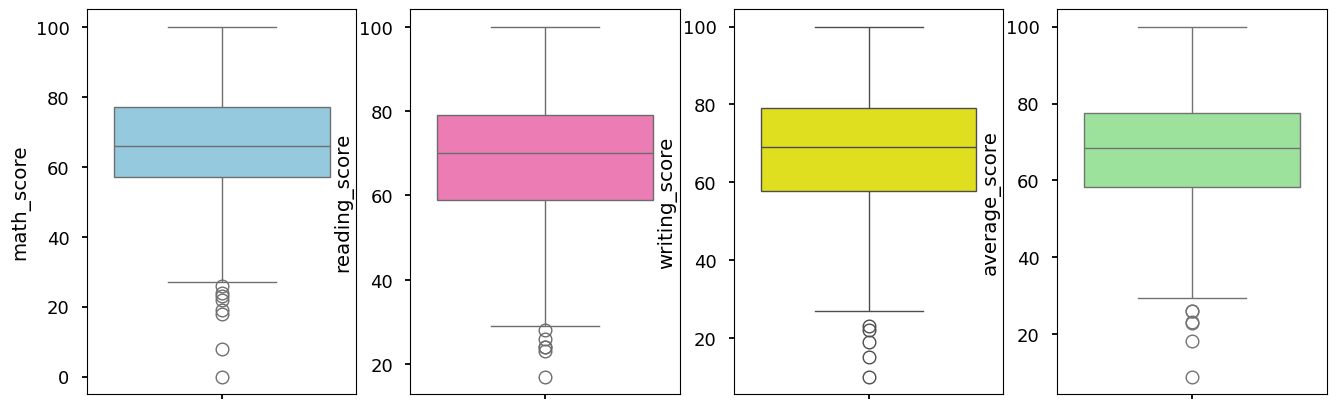

In [72]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average_score'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

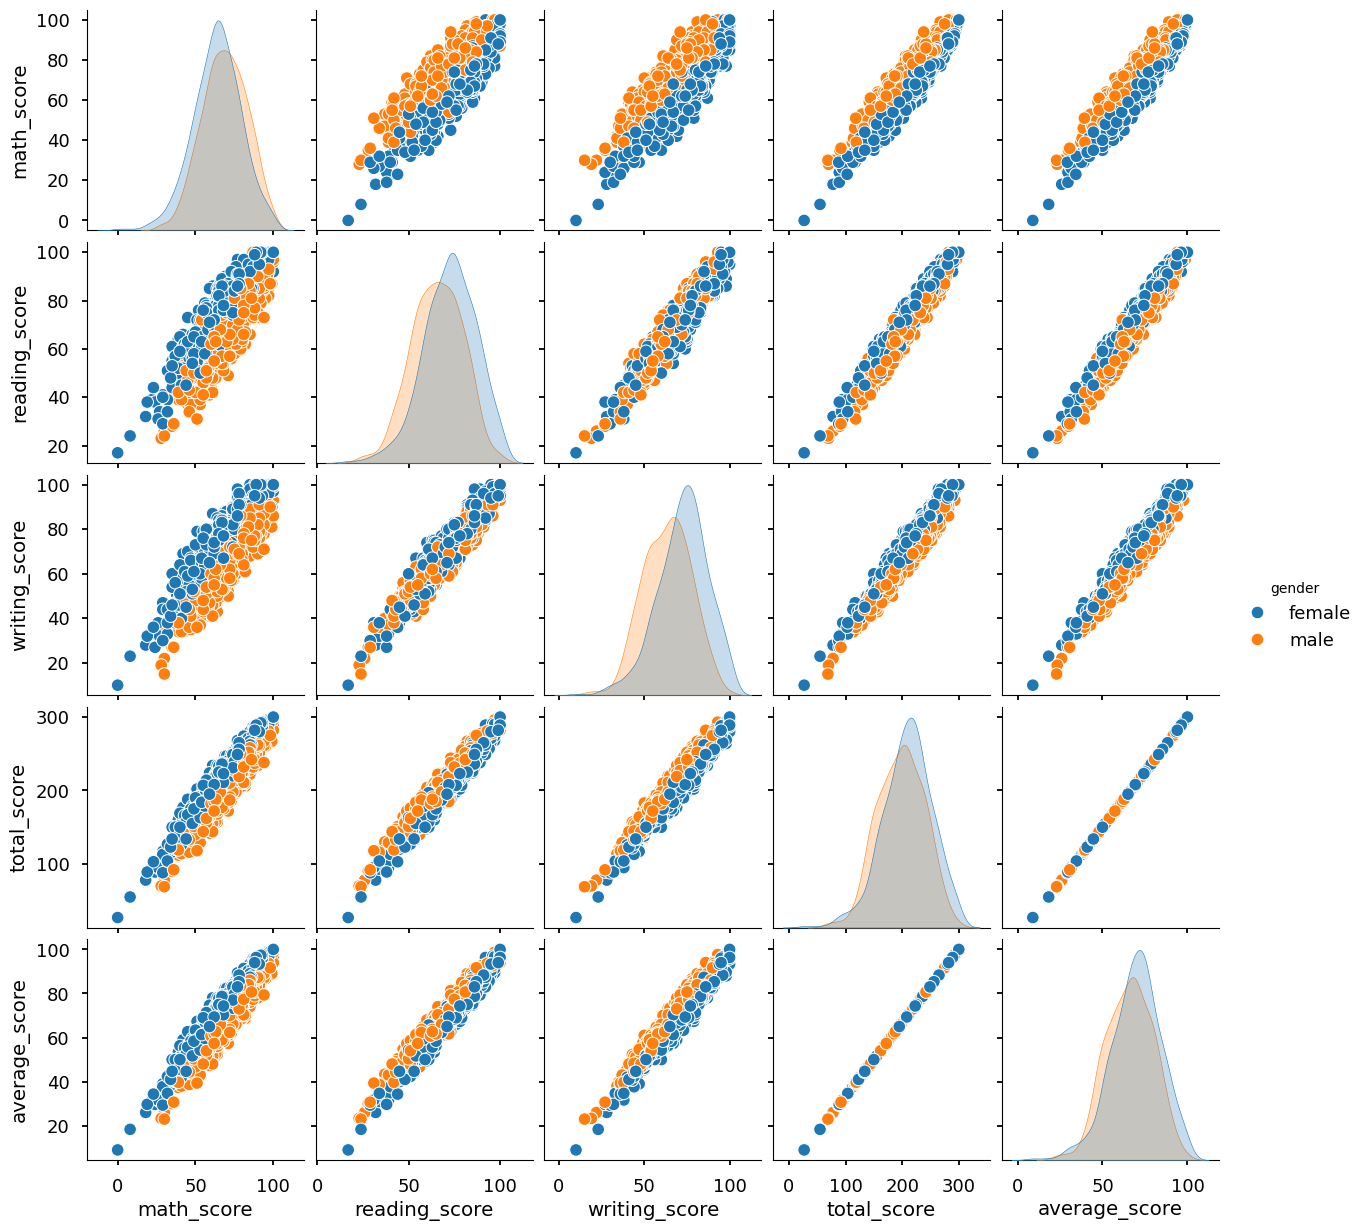

In [73]:
sns.pairplot(data,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.